In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
%matplotlib inline

In [2]:
df = pd.read_csv('sales.csv',
                index_col=0, parse_dates=True) # Convert month column as an index
df # parse_dates=True tells that index is a date column only, 3 years data is available

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3
1990-06-01,168.5
1990-07-01,231.8
1990-08-01,224.5
1990-09-01,192.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1990-01-01 to 1992-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [4]:
df.shape

(36, 1)

# Upsampling - Low to High Frequency

In [9]:
upsampled = df.resample('D').asfreq()   #('D') represents daily samples, M-Monthly, Y-yearly, Q-Quarterly etc.
# The resample() method groups your data into the specified frequency (in this case, 'D' for daily),
# but you need to tell pandas what to do with those groups:
# for example, calculate the mean, sum, or simply fill in the gaps with asfreq()
# asfreq() is used to generate a new index based on the resampling frequency without aggregating the data.
# It simply reindexes the data to match the new frequency and leaves the existing data values unchanged.

upsampled.head(60) # Check every month's 1st day

,Sales
Month,
1990-01-01,266.0
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
1990-01-06,NaN
1990-01-07,NaN
1990-01-08,NaN
1990-01-09,NaN


# Interpolate the missing values

In [10]:
interpolated = upsampled.interpolate() # Fill the values in between for remaining days
interpolated.head(50)

,Sales
Month,
1990-01-01,266.000000
1990-01-02,262.125806
1990-01-03,258.251613
1990-01-04,254.377419
1990-01-05,250.503226
1990-01-06,246.629032
1990-01-07,242.754839
1990-01-08,238.880645
1990-01-09,235.006452


<Axes: xlabel='Month'>

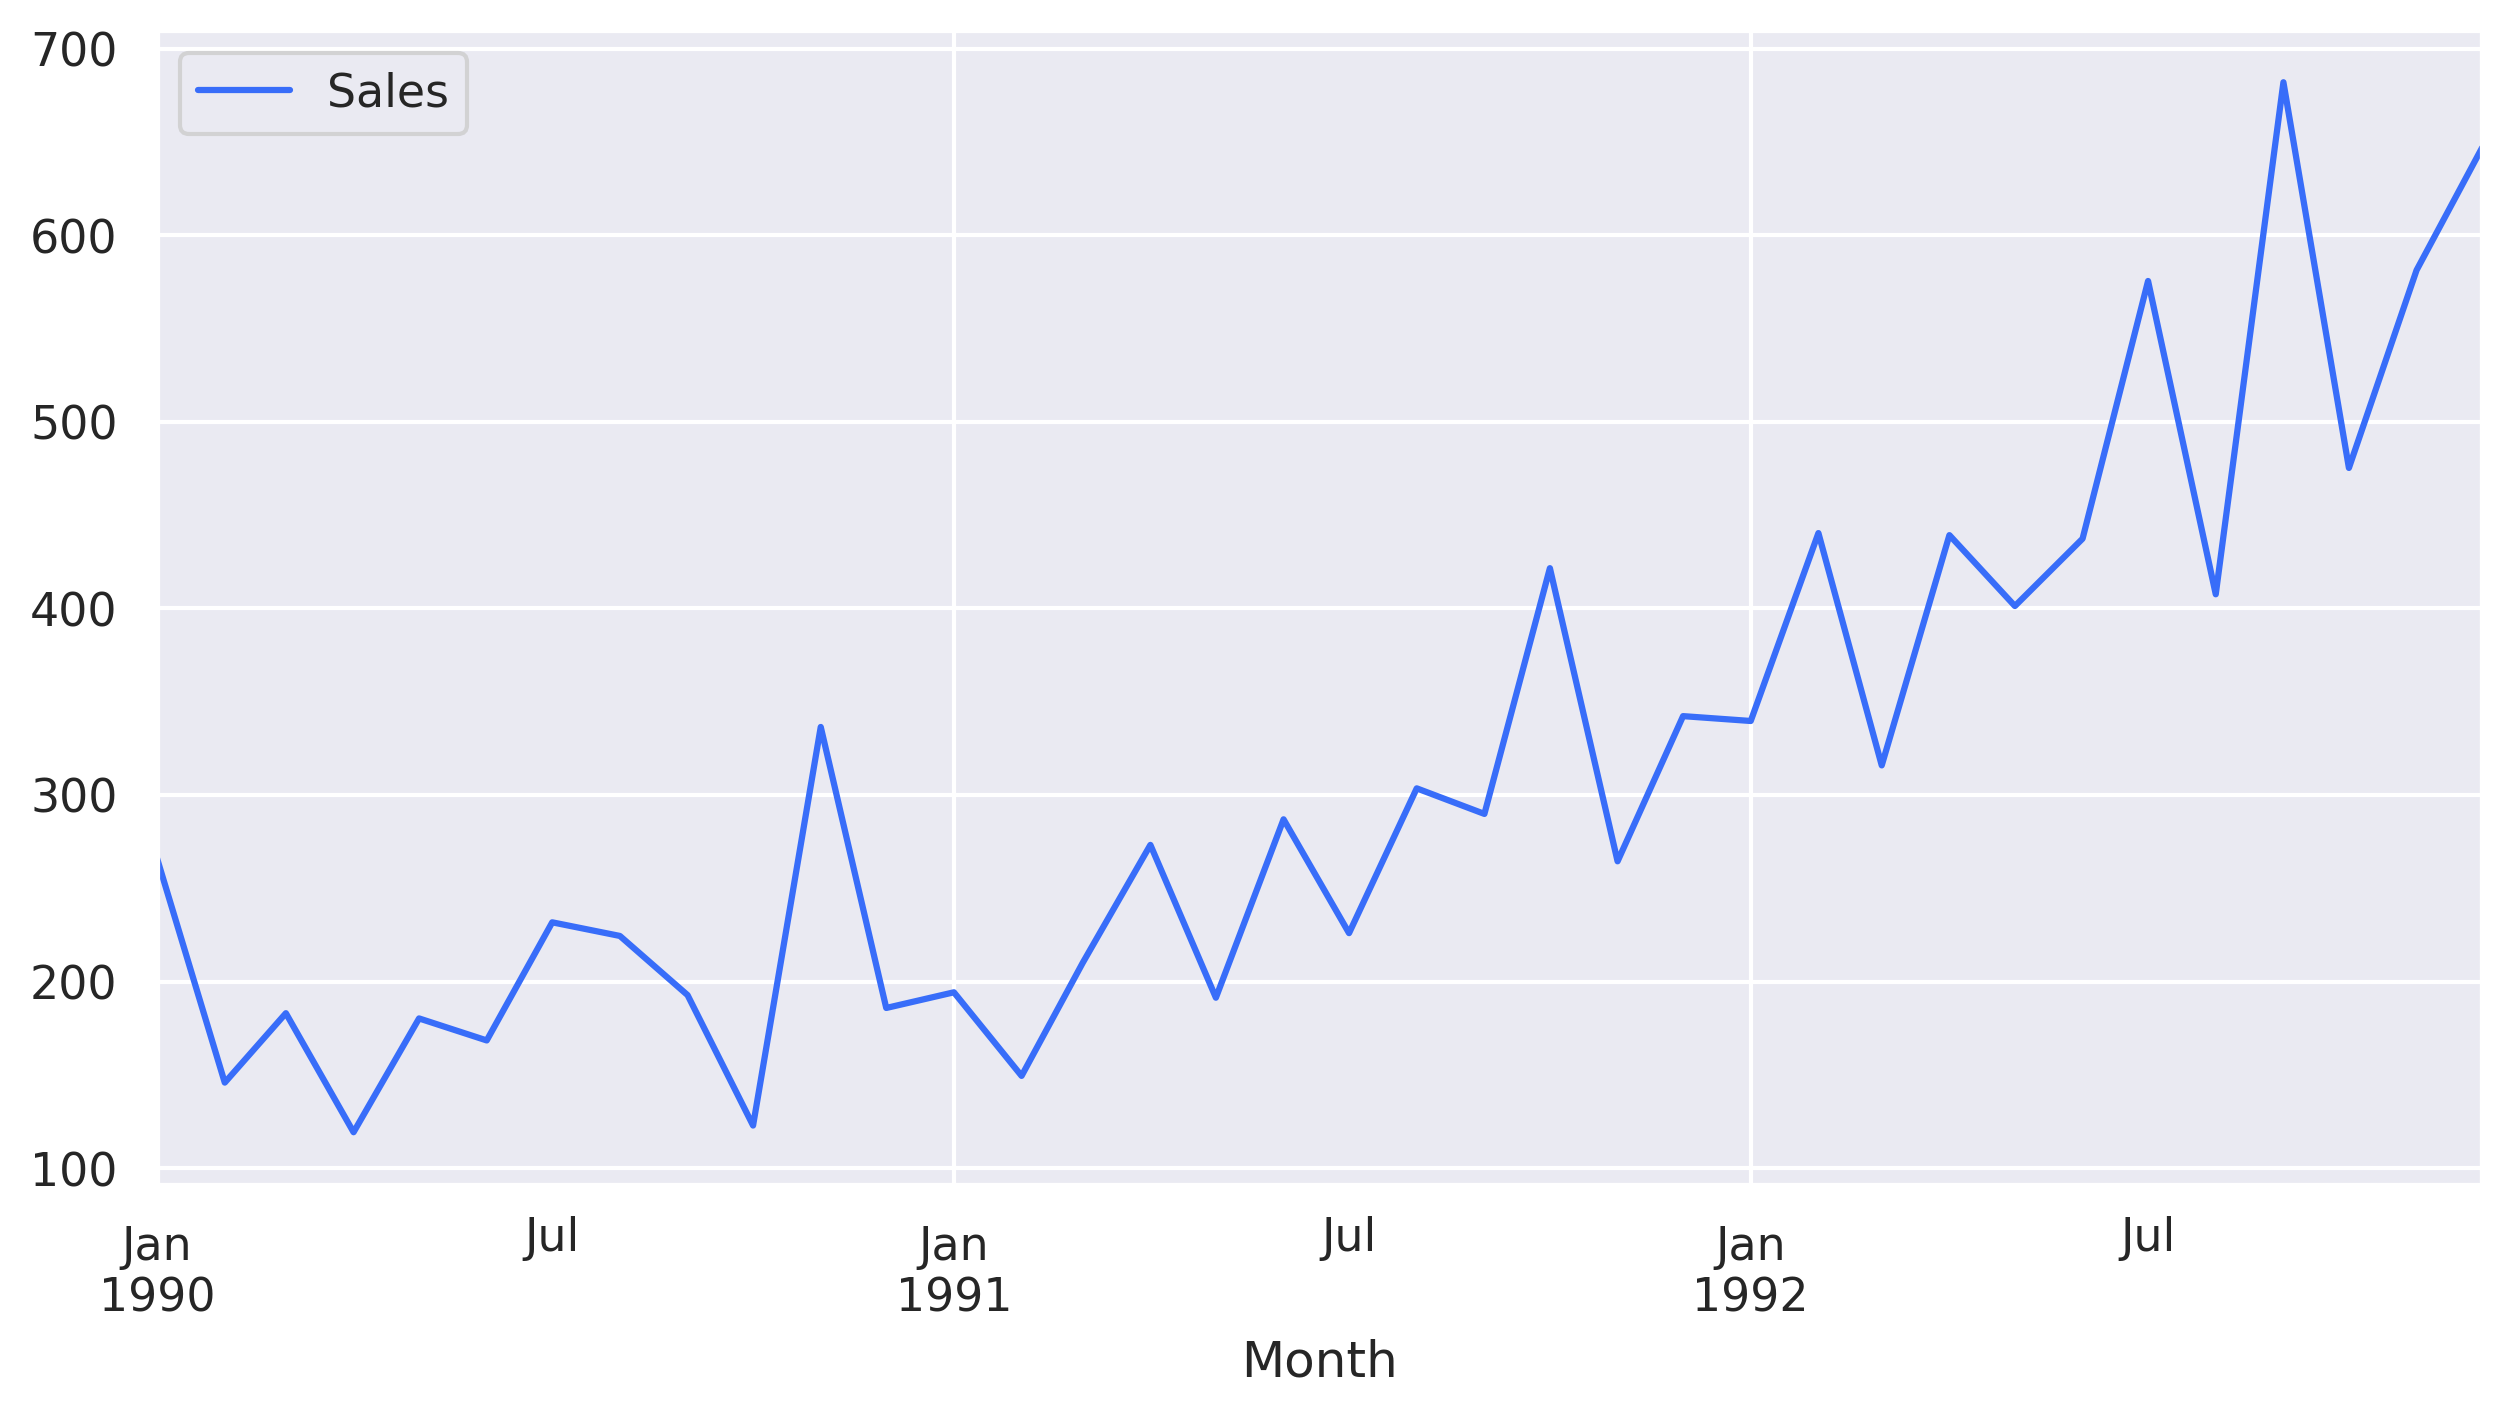

In [11]:
interpolated.plot() # Plot line plot, By default month on x axis and sales on y axis
# no seasonality, exponential increasing trend is available

# Downsampling

In [12]:
downsampled = df.resample('Q').mean()
downsampled

<ipython-input-12-476c187d5add>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  downsampled = df.resample('Q').mean()


,Sales
Month,
1990-03-31,198.333333
1990-06-30,156.033333
1990-09-30,216.366667
1990-12-31,215.100000
1991-03-31,184.633333
1991-06-30,250.566667
1991-09-30,273.166667
1991-12-31,342.800000
1992-03-31,365.333333


In [13]:
downsampled.shape

(12, 1)

<Axes: xlabel='Month'>

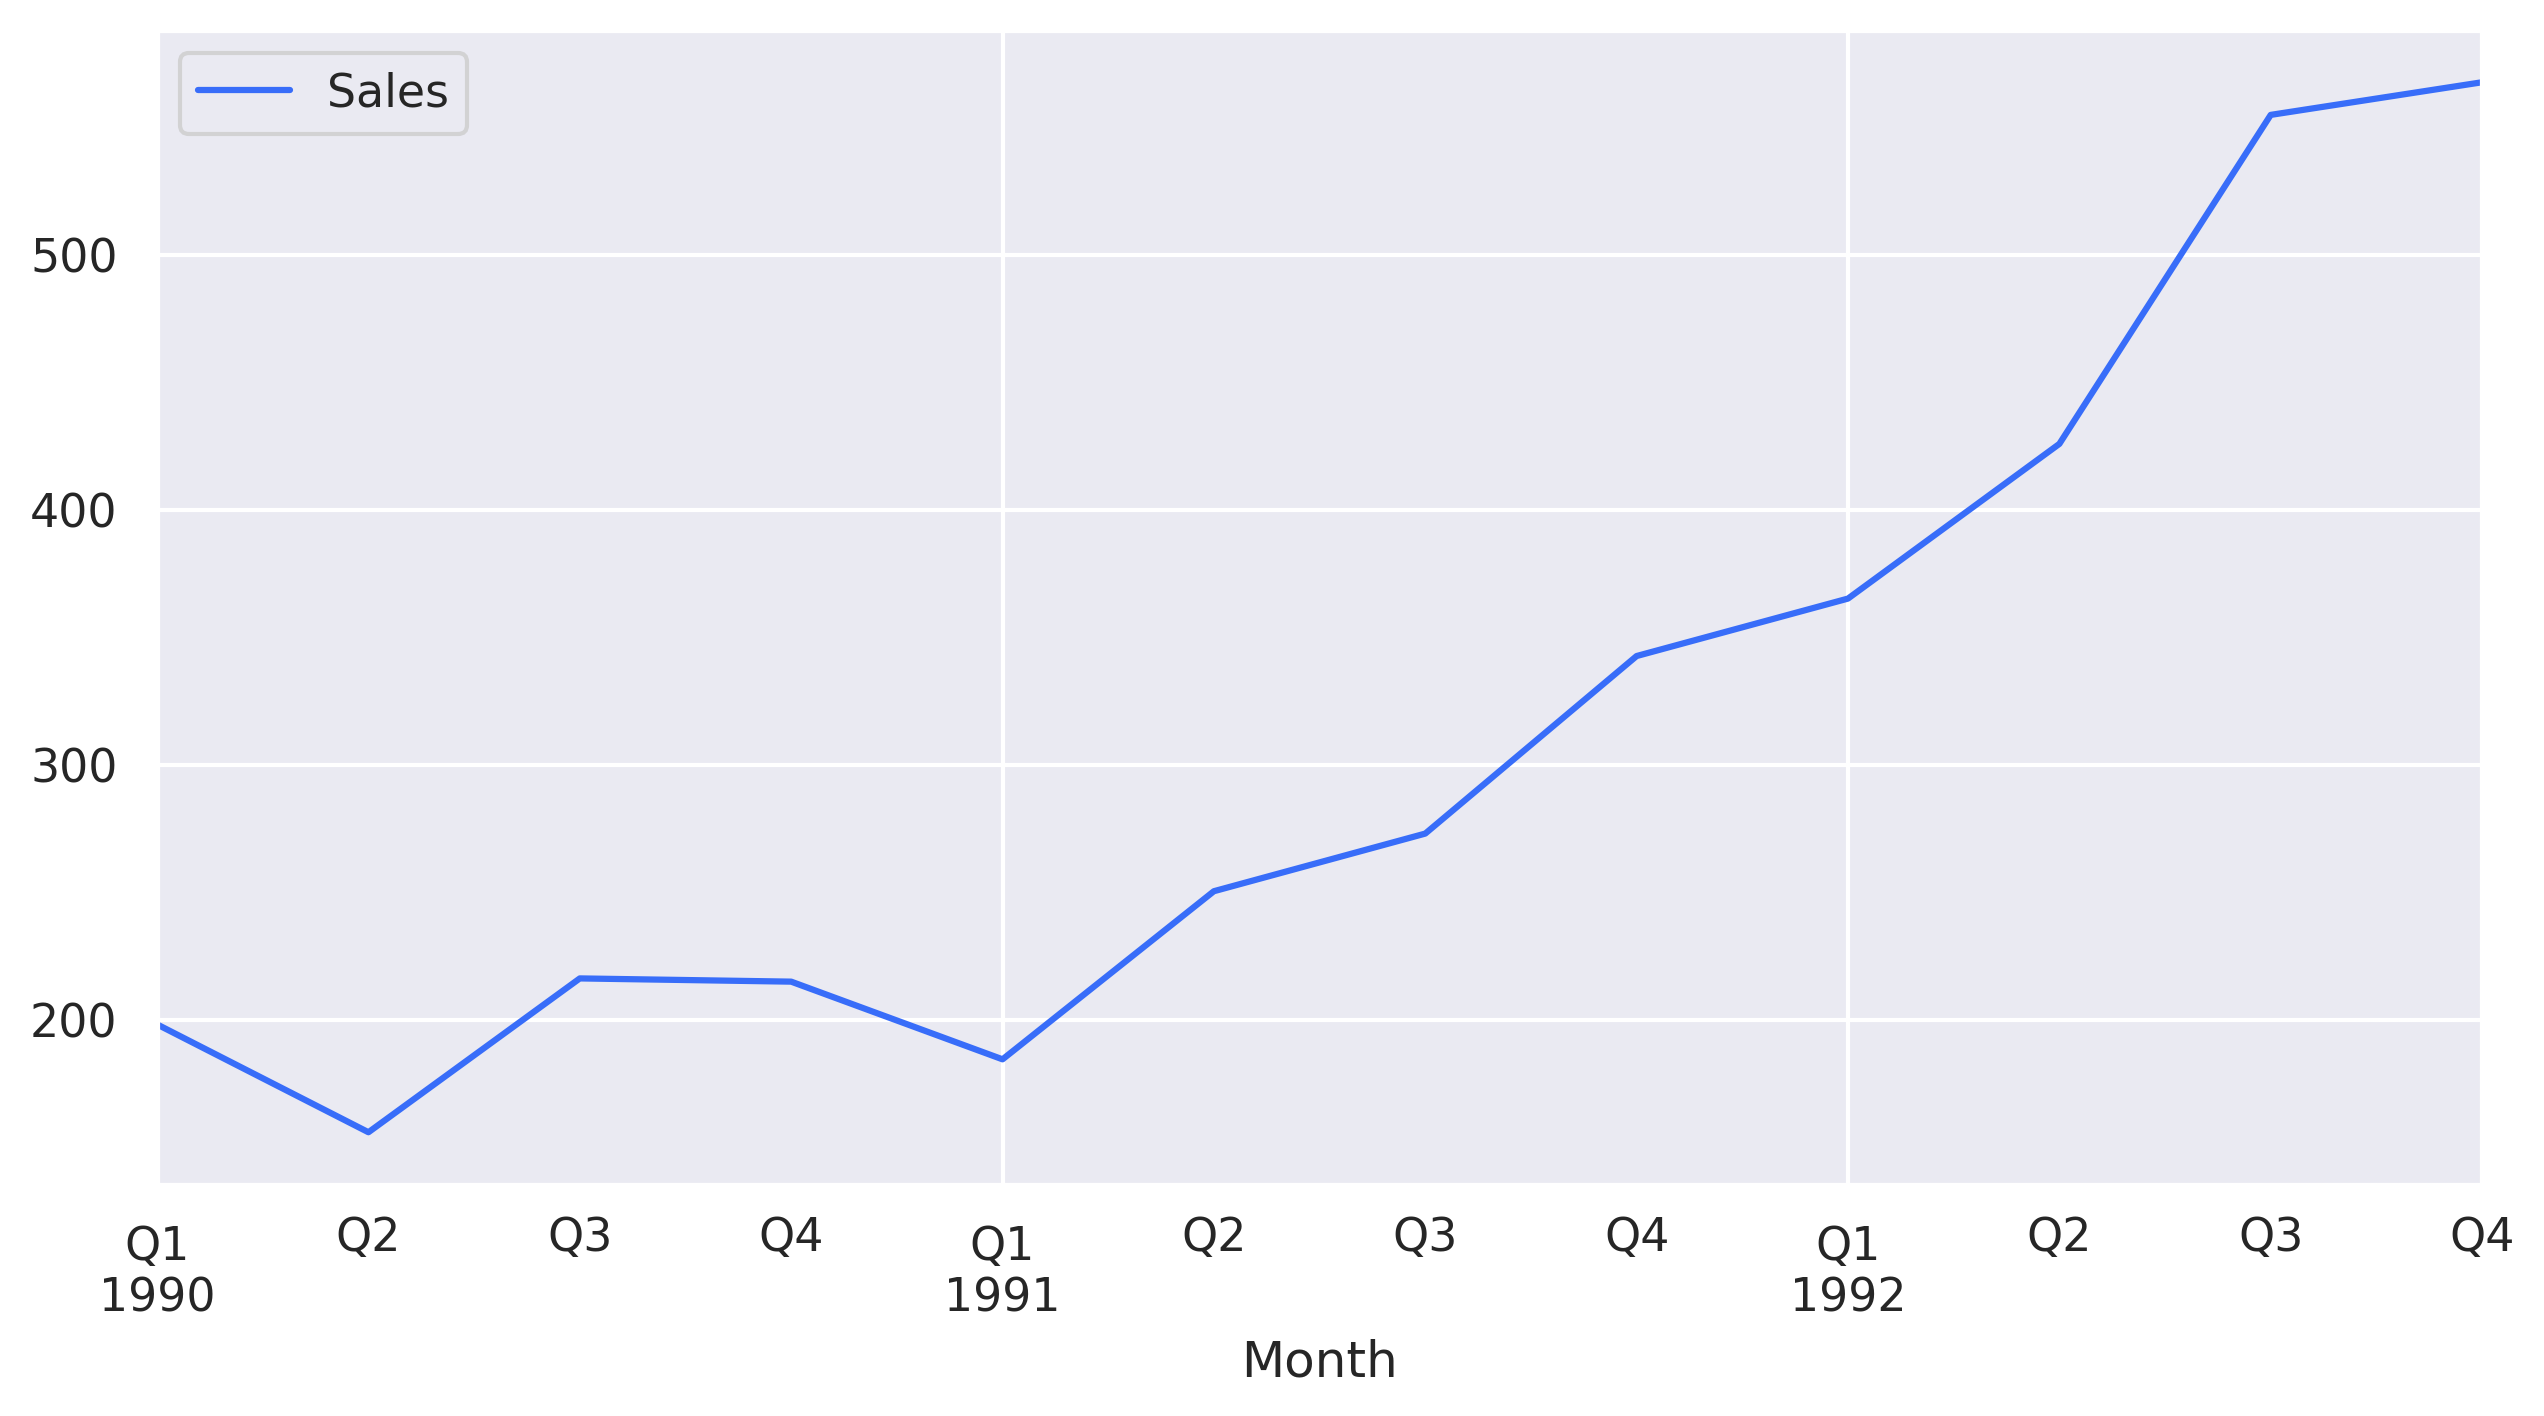

In [14]:
downsampled.plot()